<a href="https://colab.research.google.com/github/rahulsm27/ML/blob/main/Reinforcement%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

env = gym.make('Taxi-v3',render_mode='ansi')
env.reset()

print(env.render())
# print(env.action_space)
# print(env.observation_space)

# obs, reward,terminated, truncated,_ = env.step(0)
# print('Observation:', obs)
# print('Reward:',reward)
# print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [ ]:

import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

class QLearningAgent:
    def __init__(self,env,learning_rate,initial_epsilon, epsilon_decay,final_epsilon,discount_factor = 0.95
    ):

        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        # Initialize an empty dictionary of state-action values
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

    def get_action(self, obs) -> int:



        x= np.random.rand()
        if x < self.final_epsilon :
            return self.env.action_space.sample()

        else:
            return np.argmax(self.q_values[obs])



    def update(self, obs, action, reward, terminated, next_obs):
        if not terminated:
            future_q_value = np.max(self.q_values[next_obs])
            self.q_values[obs][action] += self.learning_rate*(reward + self.discount_factor*future_q_value-self.q_values[obs][action])



    def decay_epsilon(self):
        """Decrease the exploration rate epsilon until it reaches its final value"""
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

In [ ]:

def train_agent(agent,env, episodes, eval_interval=100):
    rewards = []
    best_reward = -np.inf
    for i in range(episodes):
        obs,_ = env.reset()
        terminated = False
        truncated = False
        length = 0
        total_reward = 0

        while (terminated == False) and (truncated == False) :

            action = agent.get_action(obs)
            next_obs, reward,terminated, truncated,_ = env.step(action)

            agent.update( obs, action, reward, terminated, next_obs)
            obs = next_obs
            length = length+1
            total_reward += reward

        agent.decay_epsilon()
        rewards.append(total_reward)

        if i >= eval_interval:
            avg_return = np.mean(rewards[i-eval_interval : i])
            best_reward = max(avg_return,best_reward)
        if i%eval_interval == 0 and i > 0:

            print(f"Episode{i} -> best_reward={best_reward} ")
    return rewards










In [ ]:
episodes = 20000
learning_rate =0.5
discount_factor = 0.95
initial_epsilon = 1
final_epsilon = 0
epsilon_decay = ((final_epsilon-initial_epsilon) / (episodes/2))
env = gym.make('Taxi-v3',render_mode='ansi')
agent = QLearningAgent(env, learning_rate, initial_epsilon, epsilon_decay, final_epsilon)

returns =  train_agent(agent, env, episodes)



Episode100 length = 184 best_reward=-223.36 
Episode200 length = 68 best_reward=-123.42 
Episode300 length = 21 best_reward=-36.67 
Episode400 length = 49 best_reward=-11.48 
Episode500 length = 18 best_reward=-5.0 
Episode600 length = 14 best_reward=-2.42 
Episode700 length = 11 best_reward=-2.02 
Episode800 length = 15 best_reward=3.92 
Episode900 length = 12 best_reward=4.82 
Episode1000 length = 9 best_reward=4.82 
Episode1100 length = 12 best_reward=6.95 
Episode1200 length = 15 best_reward=6.95 
Episode1300 length = 12 best_reward=7.25 
Episode1400 length = 15 best_reward=7.58 
Episode1500 length = 16 best_reward=7.58 
Episode1600 length = 13 best_reward=7.96 
Episode1700 length = 23 best_reward=7.96 
Episode1800 length = 11 best_reward=7.96 
Episode1900 length = 10 best_reward=8.22 
Episode2000 length = 13 best_reward=8.22 
Episode2100 length = 16 best_reward=8.22 
Episode2200 length = 12 best_reward=8.22 
Episode2300 length = 15 best_reward=8.22 
Episode2400 length = 19 best_re

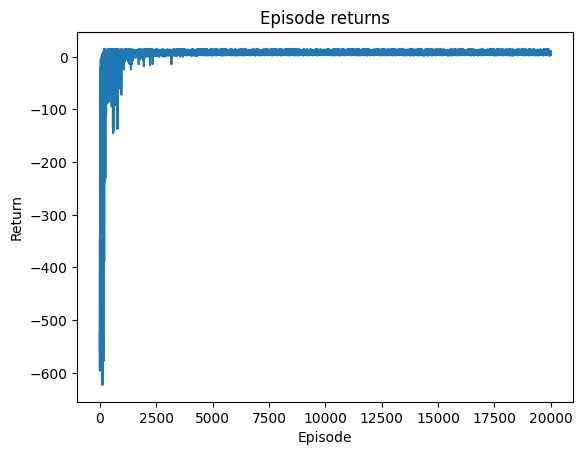

In [ ]:
def plot_returns(returns):
    plt.plot(np.arange(len(returns)), returns)
    plt.title('Episode returns')
    plt.xlabel('Episode')
    plt.ylabel('Return')
    plt.show()

plot_returns(returns)



In [ ]:
def show_policy(agent, env):
    agent.epsilon = 0    # No need to keep exploring
    obs, _ = env.reset() # get the current state
    env.render()
    terminated = truncated = False

    while terminated == False and truncated == False   :
        action = agent.get_action(obs)
        next_obs, _, terminated, truncated, _ = env.step(action)
        print(env.render())

        obs = next_obs

env = gym.make('Taxi-v3', render_mode='ansi')
show_policy(agent, env)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | :